# Clustering Country Data 
## Introduction

This project is inspired by the **Kaggle** dataset: ***Unsupervised Learning on Country Data***.
The Kaggle dataset states the problem as a Country Categorization based on their development to determine which group of countries requires the most attention from the NGO Help International: an international humanitarian NGO that fights poverty.

Our objective is to master clustering algorithms by developing naive from scratch versions and comparing their results to the sklearn and scipy versions. This Notebook will focus on the ***Hierarchical Clustering*** specifically ***Agglomerative Clustering***. A clustering method where each observation starts as its singleton cluster, then clusters are merged based on their distance iteratively until only one remains.

We implemeneted the **Agglomerative Clustering** from scratch in the class *AgglomerativeClustering*.


### Libraries

In [1]:
#Data manipulation and preparation
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 12})
from sklearn.preprocessing import StandardScaler

#Scipy Clustering
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

#Sklearn Clustering
from sklearn.cluster import AgglomerativeClustering

#From Scratch Clustering 
from Clustering_Algorithms import AgglomerativeClustering_fs

## Data
As mentioned in the introduction, we extracted data from the **Kaggle** dataset: ***Unsupervised Learning on Country Data***.
The downloaded data contained two CSV files:
- data-dictionary.csv: A description of the column in the Country-data.csv file.
- Country-data.csv: The country dataset to be clustered.

In [2]:
#Read dictionary data
data_dictionary = pd.read_csv('./Data/data-dictionary.csv')
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [3]:
#Read country data
country_data = pd.read_csv('./Data/Country-data.csv')
country_data = country_data.set_index('country')
features = country_data.columns
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


The country data contains nine socio-economic and health factors with different scales that can impact the distance between clusters, so we will standardize our dataset before jumping into the clustering section.

In [4]:
#Standarization 
sc = StandardScaler()
X = sc.fit_transform(country_data)
X[:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

## Single Linkage Clustering
This section will focus on *Agglomerative clustering* using **Single Linkage Criterion**.

Single Linkage Critereon: is agglomerative clustering method where we merge the pair of clusters (s) and (r) that has the smallest distance. And the new distance between the new formed cluster (rs) and a point i is $d[(rs),i] = min(d[(r),i],d[(s),i])$.

### Clustering using the scipy linkage
In this section, we will use the Scipy linkage function that takes as input an array of Pairwise distances between observations and returns a linkage matrix.

In [5]:
# Clustering using the scipy linkage
Z = linkage(pdist(X), 'single')
Z[:15]

array([[ 41.        , 121.        ,   0.27051092,   2.        ],
       [ 75.        , 139.        ,   0.34593963,   2.        ],
       [ 24.        ,  85.        ,   0.42313147,   2.        ],
       [158.        , 168.        ,   0.44439532,   3.        ],
       [ 60.        , 170.        ,   0.48706989,   4.        ],
       [111.        , 171.        ,   0.49433038,   5.        ],
       [ 92.        , 169.        ,   0.51509622,   3.        ],
       [100.        , 173.        ,   0.51637177,   4.        ],
       [122.        , 172.        ,   0.54410516,   6.        ],
       [  1.        ,  48.        ,   0.55954063,   2.        ],
       [ 53.        , 144.        ,   0.56879938,   2.        ],
       [ 29.        ,  54.        ,   0.59031996,   2.        ],
       [ 13.        , 167.        ,   0.59915403,   3.        ],
       [ 20.        , 130.        ,   0.60456236,   2.        ],
       [  6.        ,  76.        ,   0.61339705,   2.        ]])

In [6]:
Z[-15:]

array([[ 38.        , 317.        ,   1.87250938, 151.        ],
       [131.        , 318.        ,   1.9449399 , 152.        ],
       [304.        , 319.        ,   1.95496977, 155.        ],
       [132.        , 320.        ,   1.98771227, 156.        ],
       [ 49.        , 321.        ,   2.16257048, 157.        ],
       [ 87.        , 322.        ,   2.1749395 , 158.        ],
       [103.        , 163.        ,   2.2826176 ,   2.        ],
       [323.        , 324.        ,   2.35073385, 160.        ],
       [159.        , 325.        ,   2.45882604, 161.        ],
       [123.        , 326.        ,   3.18189336, 162.        ],
       [ 66.        , 327.        ,   3.23958591, 163.        ],
       [ 98.        , 133.        ,   3.73565123,   2.        ],
       [328.        , 329.        ,   3.74127926, 165.        ],
       [ 91.        , 330.        ,   4.00378615, 166.        ],
       [113.        , 331.        ,   6.84286879, 167.        ]])

The distances in the resultant Linkage matrix ranges from 0.27 to 6.84.<br>
The higher the distance between formed clusters, the higher the disparities between the countries of the group.
At the head of our Linkage matrix, we note that if we choose a maximal distance of 0.5, we will get one cluster of 4 elements, and the rest of the countries will be singletons. For our clusterization to draw some meaningful conclusions, we will need to choose a maximal distance that reduces the clusters.<br>
In the tail of our Linkage matrix, We can see at 3.7 that we merged two singletons. It implies that if we choose a 3.8 as the maximal distance, we will obtain: one cluster of 163 countries, another with two countries, and two singletons. We need to highlight two remarks:
- In our dataset, even with a high maximal distance, we will get singletons. The last line is a marge between a 166 elements cluster and a singleton.
- The cluster is large, that we can't draw any meaningful patterns from it.

To ensure that we form well compact clusters, we need to choose a small enough maximal distance. But still high enough to reduce the number of singletons.<br>
We will use the dendrogram to choose the maximal distance, by drawing the lines at 1, 1.5, 2, and 2.5. 

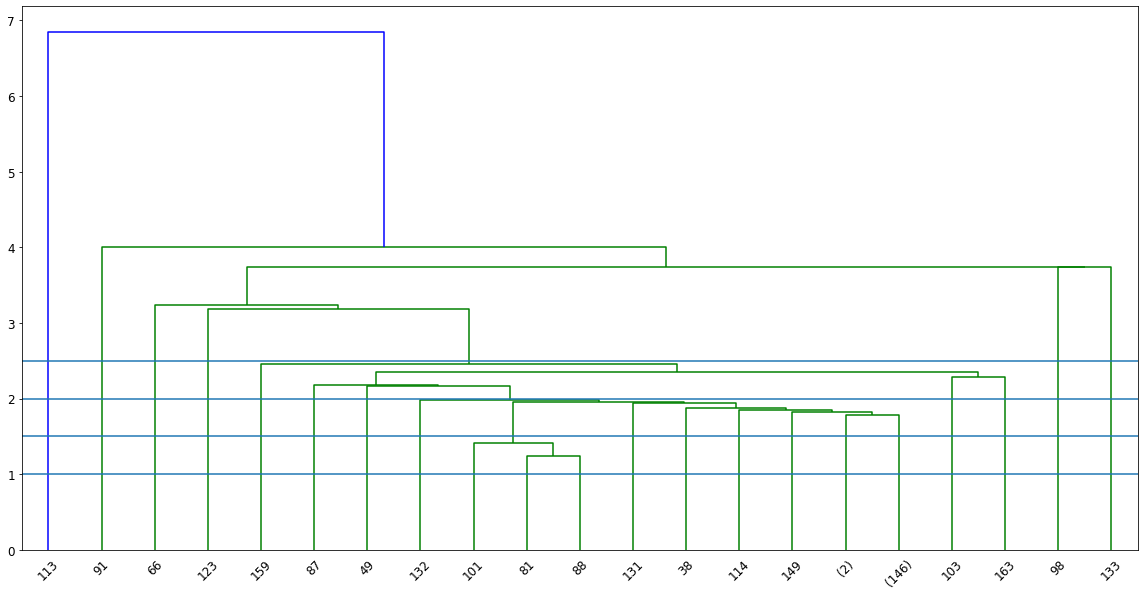

In [7]:
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z,truncate_mode='level',p=15,get_leaves=False,leaf_font_size=12.,)
plt.axhline(y=2.5)
plt.axhline(y=2)
plt.axhline(y=1.5)
plt.axhline(y=1)
plt.show()

To have a readable graph, we have chosen to truncate our dendrogram at level 12, so we don't have all the formation steps of the cluster.
- Maximal distance 1.0: From the dendrogram, we have at least 19 singletons, a cluster with two countries, and another with a maximum of 146 members. 
- Maximal distance 1.5: In addition to the cluster formed at 1, three countries merged to a new one. (country indexes: 101, 81, and 88)
- Maximal distance 2.0: We see that the line cuts the dendrogram at the root level of a cluster with 156 counties, and all the 11 remaining countries are singletons.
- Maximal distance 2.5: At this level, only six countries didn't merge with any cluster. And we have a group with 161 countries.

High distances obtained a large cluster, from which we can't obtain meaningful patterns, and didn't guarantee to get rid of singletons. So we will focus on the clusters of maximal distance 1.

In [8]:
max_dist=1
country_data['Clusters_1'] = fcluster(Z, t=max_dist, criterion='distance')
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters_1
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,13
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,27
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,34
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,53
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,27


In [9]:
len(np.unique(country_data.Clusters_1))

72

In [10]:
country_data.Clusters_1.value_counts()[country_data.Clusters_1.value_counts()>1]

27    59
9     16
13     8
11     5
15     4
14     3
4      2
5      2
26     2
8      2
30     2
29     2
Name: Clusters_1, dtype: int64

We obtained 72 clusters, including 60 singletons, six with two countries each, and six others of sizes 4, 5, 8, 16, and the largest cluster with 59 countries.<br>
In the following, we will compare the results to the sklearn and from-scratch ones, then take a deeper look into the obtained clusters.

## Clustering using Sklearn *AgglomerativeClustering*
The sklearn agglomerative clusterization is via the python class AgglomerativeClustering. We will create an instance of this class with the attributes: Single linkage and maximal distance 1 to compare the results with those of the scipy library.

In [11]:
model = AgglomerativeClustering(distance_threshold=max_dist, n_clusters=None, linkage= 'single')
country_data['Clusters_2'] = model.fit_predict(X)
len(np.unique(country_data.Clusters_2))

72

In [12]:
country_data.Clusters_2.value_counts()[country_data.Clusters_2.value_counts()>1]

2     59
4     16
1      8
8      5
0      4
3      3
33     2
6      2
7      2
16     2
13     2
28     2
Name: Clusters_2, dtype: int64

We obtained the same number of clusters and the same sizes as we did with Scipy. <br>
To make sure that these are the same clusters. We will count the number of different labels of Scipy clusters for each sklearn cluster. If we have the same cluster distribution, then we should obtain one for each.

In [13]:
for i in country_data.Clusters_2.value_counts()[country_data.Clusters_2.value_counts()>1].index:
    print(len(np.unique(country_data[country_data['Clusters_2']==i].Clusters_1)))

1
1
1
1
1
1
1
1
1
1
1
1


Each cluster obtained with the Sklean implementation corresponds to one obtained with scipy. It proves that we achieved the same clusterization.
## Clustering using Cluserting_Algorithms module
In this section, we will test our class AgglomerativeClustering_fs. This class contains a constructor that we will use to create our model instance with the attribute linkage='single'. This attribute determines the linkage criterion in our clusterization.<br>
Then we will fit our model to the country data set. The fit method calculates the similarity matrix using the euclidean distance, then computes the linkage matrix using the linkage criterion specified when creating the model instance.<br>

In [14]:
#Clustering using Cluserting_Algorithms module
model_new = AgglomerativeClustering_fs.AgglomerativeClustering_fs(linkage='single')
model_new.fit(X)
L = model_new.L
L[:5]

array([[ 41.        , 121.        ,   0.27051092,   2.        ],
       [ 75.        , 139.        ,   0.34593963,   2.        ],
       [ 24.        ,  85.        ,   0.42313147,   2.        ],
       [158.        , 168.        ,   0.44439532,   3.        ],
       [ 60.        , 170.        ,   0.48706989,   4.        ]])

In [15]:
(Z == L).all()

True

We obtained the same linkage matrix as scipy, so our implementation of the single linkage algorithm is correct.<br>
We need to verify that we obtained the same clusterization. We need to compare the labels, so we will use the AgglomerativeClustering_fs method get_labels that takes as parameter max_dist, which is the threshold of maximal distance for clusters to merge. And it returns an array where the element at index 'i' corresponds to the label of the country of index 'i'.

In [16]:
country_data['Clusters_3'] = model_new.get_labels(max_dist=max_dist)
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters_1,Clusters_2,Clusters_3
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,13,1,4
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,27,2,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,34,54,24
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,53,45,53
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,27,2,1


In [17]:
len(np.unique(country_data.Clusters_3))

72

In [18]:
country_data.Clusters_3.value_counts()[country_data.Clusters_3.value_counts()>1]

1     59
2     16
4      8
3      5
8      4
9      3
12     2
10     2
11     2
7      2
6      2
5      2
Name: Clusters_3, dtype: int64

In [19]:
for i in country_data.Clusters_3.value_counts()[country_data.Clusters_3.value_counts()>1].index:
    print(len(np.unique(country_data[country_data['Clusters_3']==i].Clusters_1)))

1
1
1
1
1
1
1
1
1
1
1
1


We obtained the same number of clusters and sizes, and each obtained with our from-scratch model corresponds to one of scipy. These results prove that our model got the same clusterization as the pre-defined algorithms (yeah!).
## Single Linkage Clustering Results

In [20]:
clusters_labels = country_data.Clusters_3.value_counts()[country_data.Clusters_3.value_counts()>1].index
countries_clusters = country_data[country_data['Clusters_3'].isin(clusters_labels)].reset_index().groupby(by='Clusters_3')['country'].apply(lambda x: ','.join(x))
countries_clusters

Clusters_3
1     Albania,Antigua and Barbuda,Armenia,Bahamas,Barbados,Belize,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Cape Verde,Chile,China,Colombia,Costa Rica,Croatia,Cyprus,Czech Republic,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Fiji,Georgia,Grenada,Guatemala,Guyana,Hungary,Iran,Jamaica,Kyrgyz Republic,Latvia,Lebanon,Lithuania,Macedonia, FYR,Maldives,Mauritius,Montenegro,Morocco,Panama,Paraguay,Peru,Philippines,Poland,Romania,Russia,Serbia,Slovak Republic,Slovenia,South Korea,St. Vincent and the Grenadines,Suriname,Tunisia,Turkey,Uruguay,Vanuatu
2                                                                                                                                                                                                                                                                                                                                                                                                                          

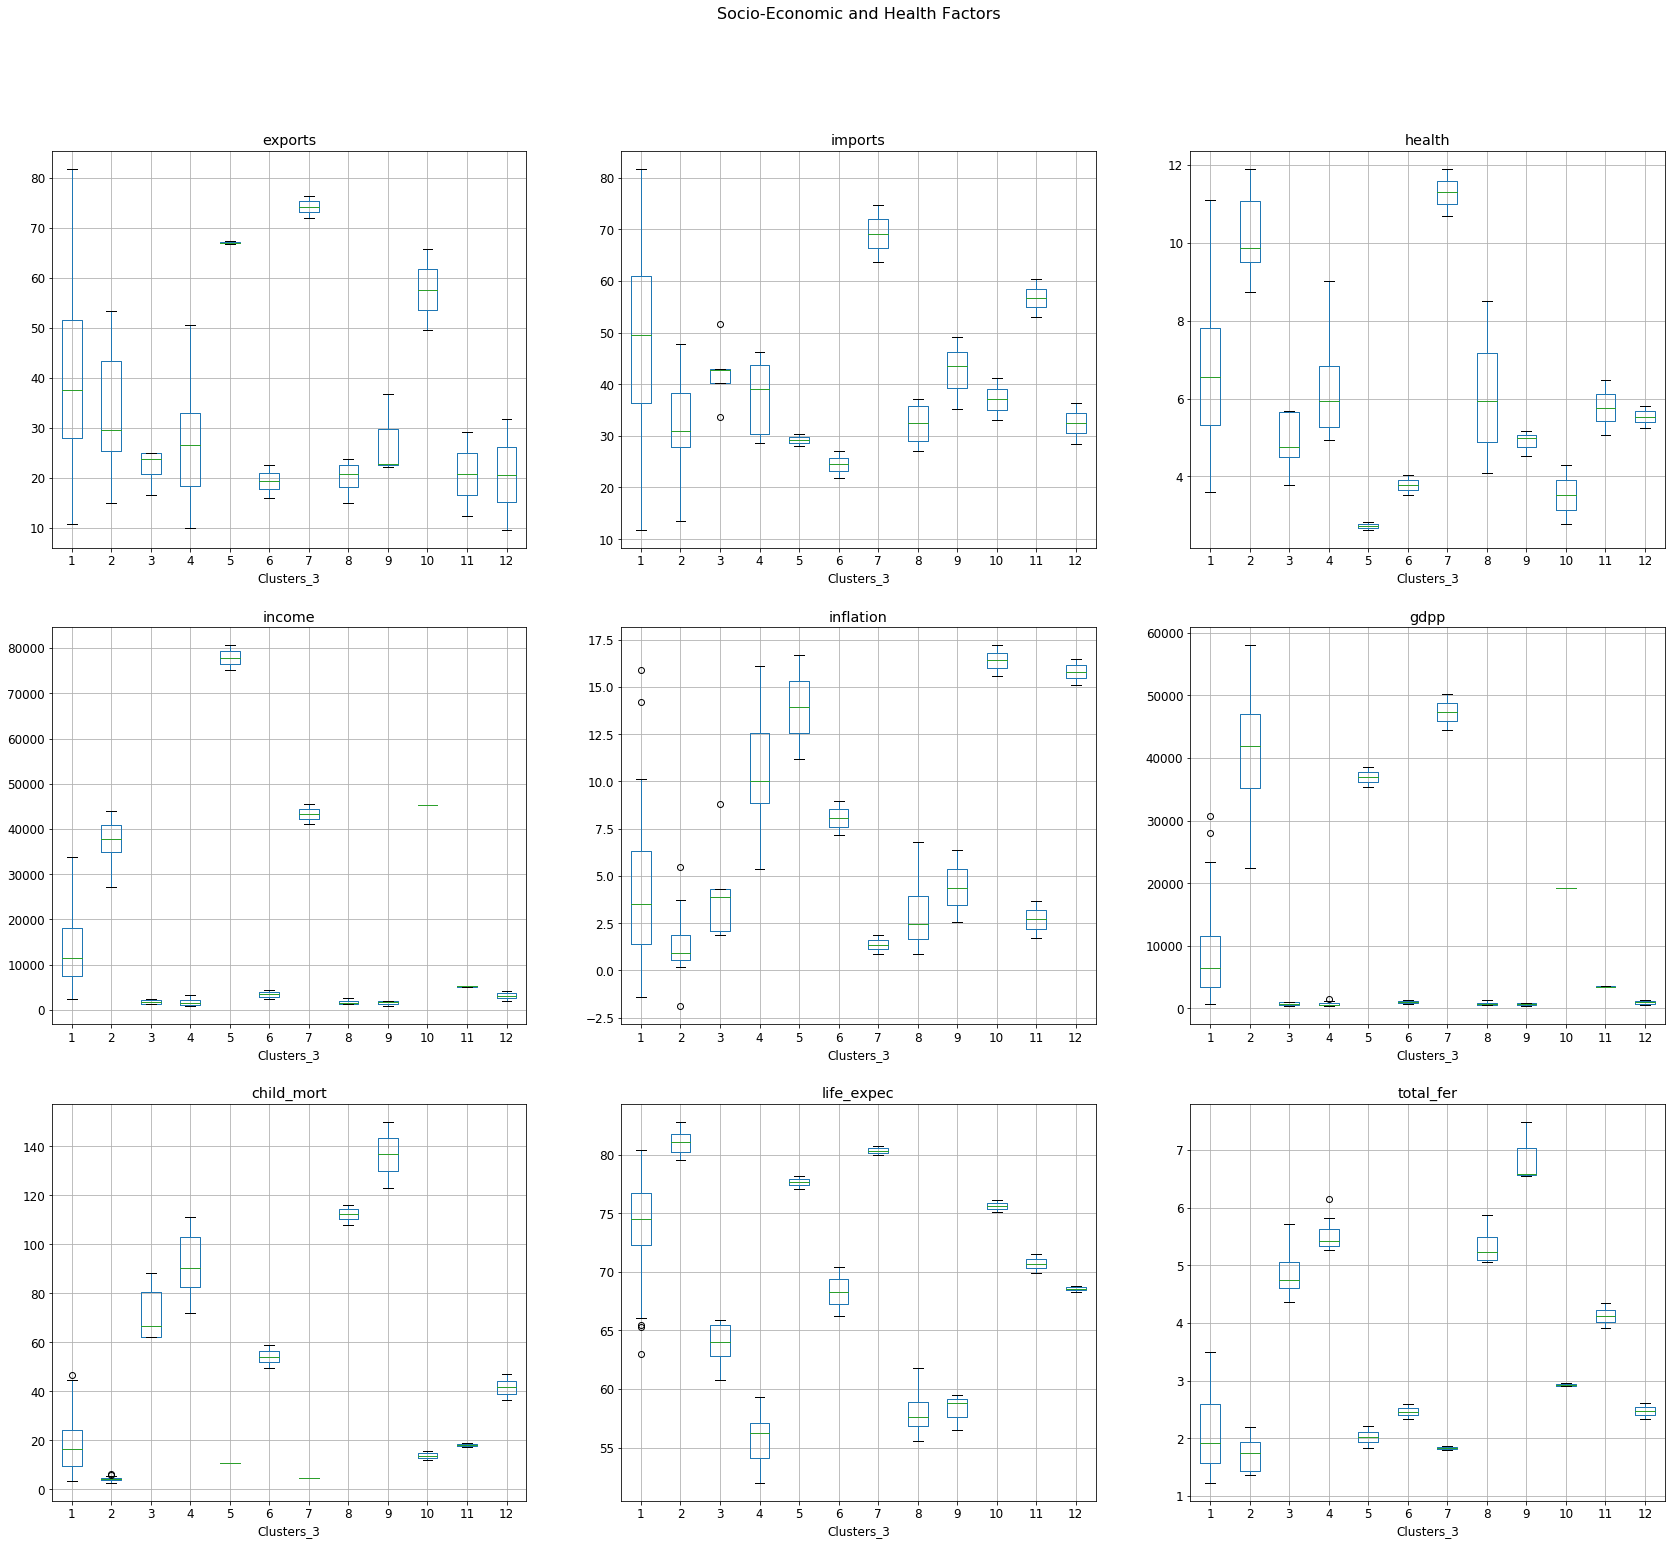

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(28, 25))

country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['exports'],by='Clusters_3', fontsize=12,ax=axes[0][0])
country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['imports'],by='Clusters_3',ax=axes[0][1])
country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['health'],by='Clusters_3',ax=axes[0][2])

country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['income'],by='Clusters_3',ax=axes[1][0])
country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['inflation'],by='Clusters_3',ax=axes[1][1])
country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['gdpp'],by='Clusters_3',ax=axes[1][2])

country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['child_mort'],by='Clusters_3',ax=axes[2][0])
country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['life_expec'],by='Clusters_3',ax=axes[2][1])
country_data[country_data['Clusters_3'].isin(clusters_labels)].boxplot(column=['total_fer'],by='Clusters_3',ax=axes[2][2])

fig.suptitle('Socio-Economic and Health Factors', fontsize=16)
plt.savefig('./Img/Socio_Economic_Health_Factors.png')

Overall we can see few overlaps between the boxplots, indicating a good heterogeneity between the clusters. It can be due to their small since six of them contain only two countries each. But some, and particularly the first one, have extended boxes that stipulate generalized groups with disparate countries. We note that the first cluster, which has the most extended boxplots, is also the largest in terms of the number of countries.
 
The Income and GDPP graphs show some distinguished clusters. We can see that clusters: 3, 4, 6, 8, 9, 11, and 12 have the lowest Net Income per person and lowest GDP per Capita. We can see that these same clusters have an economic unbalance with their imports exceeding their exports. Among these clusters, 3, 4, 8, and 9 have the highest children mortality and fertility rates. And the lowest life expectancy. These Factors indicate that clusters 3, 4, 6, 8, 9, 11, and 12 require humanitarian help, and most urgently the clusters 3, 4, 8, and 9.

This clustering is not appropriate for our case study. Since 60 countries are not clustered and remained singleton. And if we want to determine with certainty all the countries that require assistance, we will have to analyze all of them, which is not feasible. If we choose a higher distance threshold, we will certainly obtain fewer singletons. But we will get generalized clusters, such as cluster 1, that are difficult to analyze. 
In the future, we will look into other linkage criteria than the Single Linkage criterion.